In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("10-Ice_cream_selling_data.csv")

In [5]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


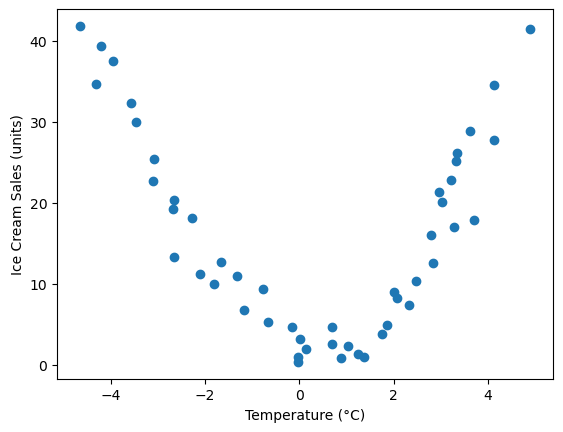

In [8]:
plt.scatter(df["Temperature (°C)"], df["Ice Cream Sales (units)"])
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales (units)")
plt.show()

# Linear Regression

In [10]:
# train - test split
X = df[["Temperature (°C)"]]
y = df["Ice Cream Sales (units)"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [11]:
# Standartization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Model Fitting
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [15]:
# Model Evalaute
y_pred = regression.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 score : ",r2)

R2 score :  0.041719866620316015


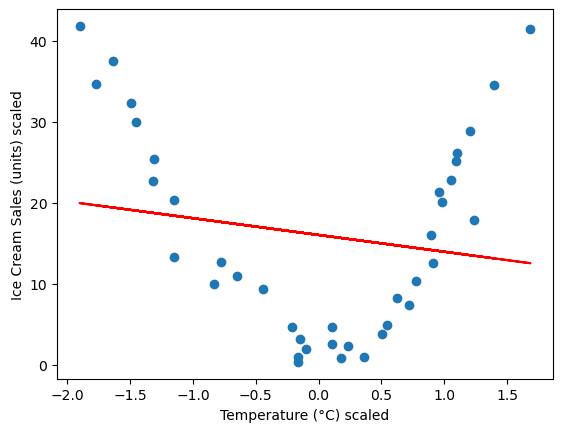

In [24]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = "red")
plt.xlabel("Temperature (°C) scaled")
plt.ylabel("Ice Cream Sales (units) scaled")
plt.show()

# Polynomal Regression

In [29]:
# Create PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

In [30]:
# Poly scaling
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [31]:
# Polynomial Model Fitting
regression = LinearRegression()
regression.fit(X_train_poly , y_train)

LinearRegression()

In [33]:
y_pred = regression.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print("R2 score : ",r2)

R2 score :  0.9494800043251951


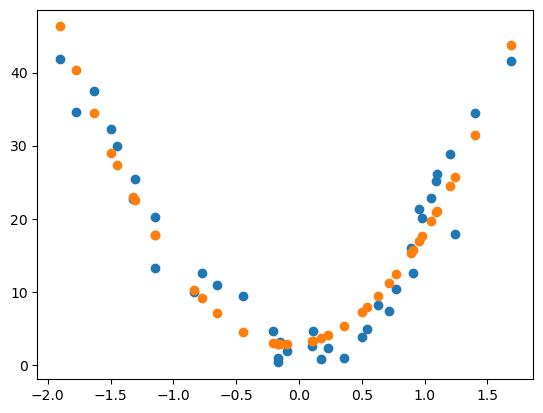

In [42]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly))
plt.show()

# Pipeline

In [65]:
def poly_regression(degree):
    scaler = StandardScaler()
    poly = PolynomialFeatures(degree= degree)
    regression = LinearRegression()
    
    pipeline = Pipeline([
        ('scaler',scaler),
        ('poly',poly),
        ('regression',regression)
    ])

    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("degree", degree, "while R2 Score:", score)

    plt.scatter(X_train,  y_train)
    plt.scatter(X_train, pipeline.predict(X_train), color="r")
    plt.show()

degree 1 while R2 Score: 0.041719866620316015


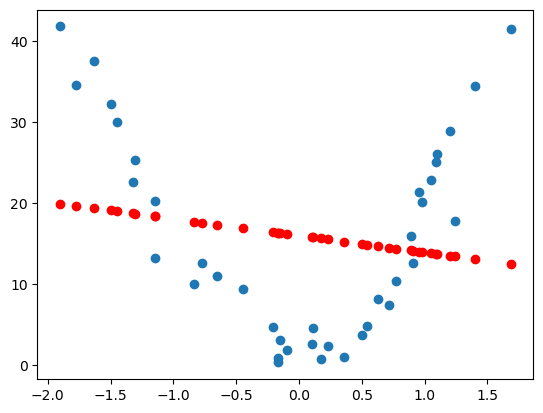

degree 2 while R2 Score: 0.9494800043251951


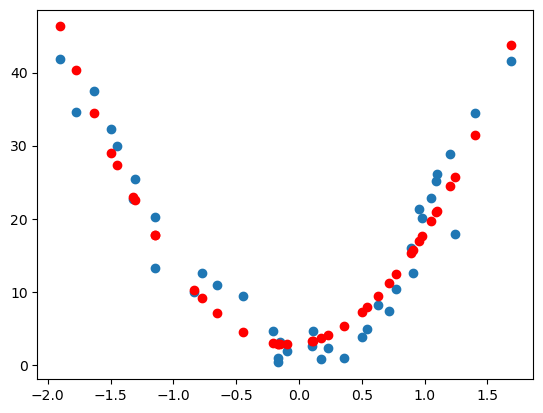

degree 3 while R2 Score: 0.9486280914238844


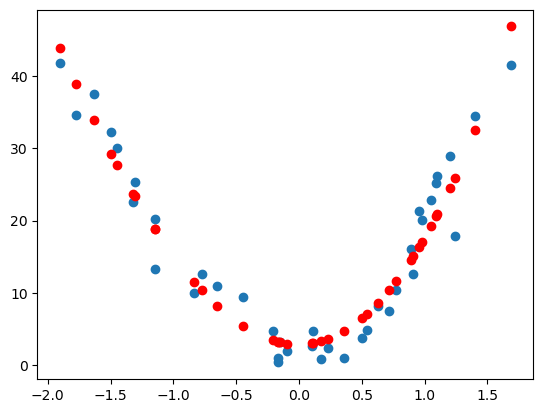

degree 4 while R2 Score: 0.9411200110967191


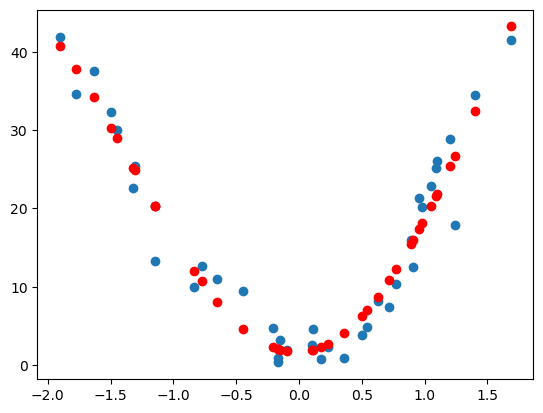

degree 5 while R2 Score: 0.9238414051085222


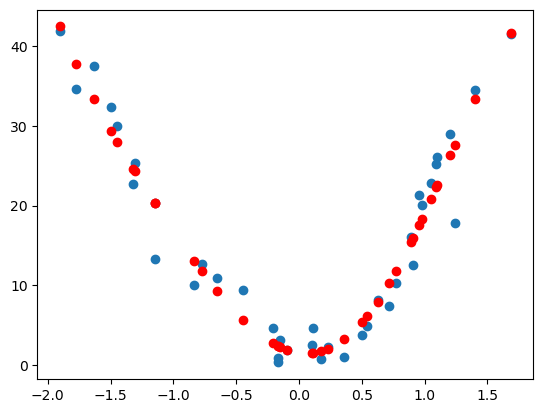

degree 6 while R2 Score: 0.9162044478527119


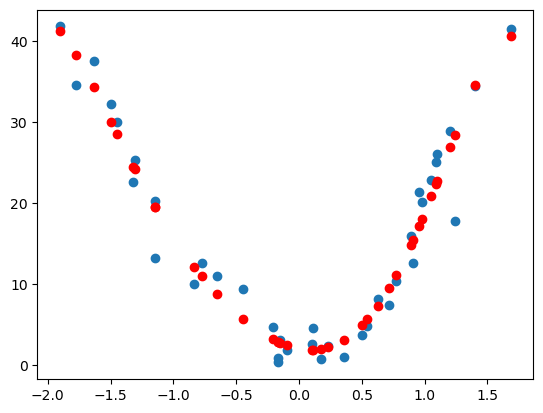

degree 7 while R2 Score: 0.9335119205787837


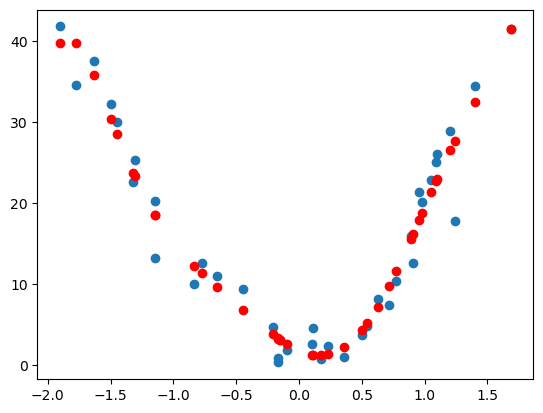

degree 8 while R2 Score: 0.9371934135553939


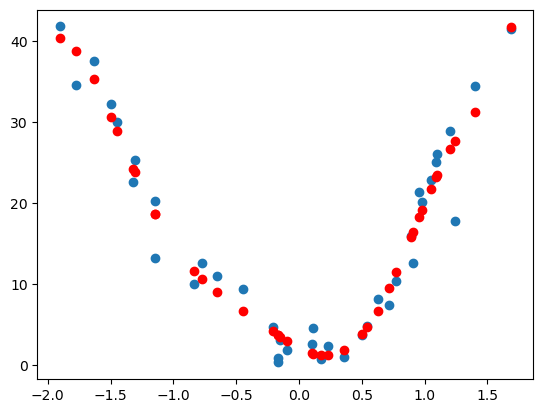

degree 9 while R2 Score: 0.9242494964979528


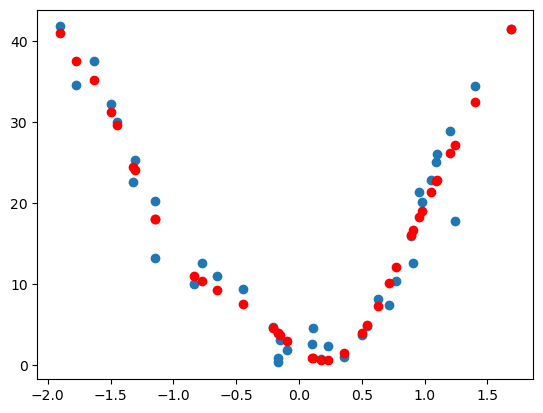

degree 10 while R2 Score: 0.9154860064747466


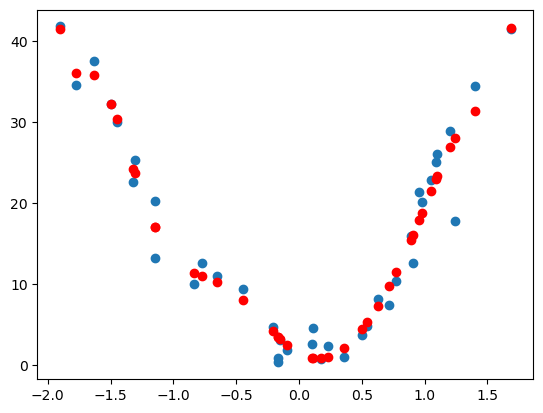

In [66]:
for degree in [1,2,3,4,5,6,7,8,9,10]:
    poly_regression(degree)